In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import os

from tqdm.autonotebook import tqdm
tqdm.pandas()

%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt

/var/folders/73/1_fd1jr14477j2fv2b70mpx00000gn/T/ipykernel_22967/3770032016.py:7: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
from kst.data_sets.TextDocument import TextDocument
from kst.data_sets.TextCorpus import TextCorpus

In [4]:
from gensim.parsing.preprocessing import (
    strip_tags,
    strip_punctuation,
    strip_multiple_whitespaces,
    remove_stopwords,
    strip_short,
    strip_numeric,
    stem_text
)

In [5]:
GENSIM_CUSTOM_TEKENIZER = [
            lambda x: x.lower(),
            strip_tags,
            strip_punctuation,
            strip_multiple_whitespaces,
            remove_stopwords,
            strip_numeric,
            lambda x: strip_short(x, minsize=2),
        ]

In [6]:
tc = TextCorpus(corpus_description='ac imdb corpus', gensim_custom_tokenizer=GENSIM_CUSTOM_TEKENIZER)

In [7]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/train/neg"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 0))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:15<00:00, 805.93it/s]


In [8]:
docs_path = "/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/train/pos"
for file in tqdm(os.listdir(docs_path)):
    if file.endswith("txt"):
        tc.add_document(TextDocument(os.path.join(docs_path,file), 1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12500/12500 [00:15<00:00, 823.82it/s]


Text(0.5, 1.0, 'Number of documents with a token, number of docs: 25000, number of tokens: 74780')

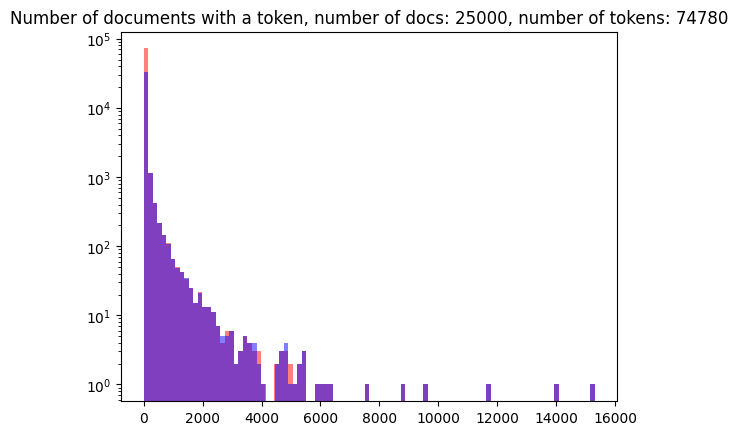

In [9]:
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > 0)], bins = 100, color = 'red', alpha = 0.5)
plt.hist([i for i in list(tc.token_doc_count.values()) if (i > 2)], bins = 100, color = 'blue', alpha = 0.5)
plt.yscale("log")
plt.title(f"""Number of documents with a token, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")

Text(0.5, 1.0, 'Number of token occurence, number of docs: 25000, number of tokens: 74780')

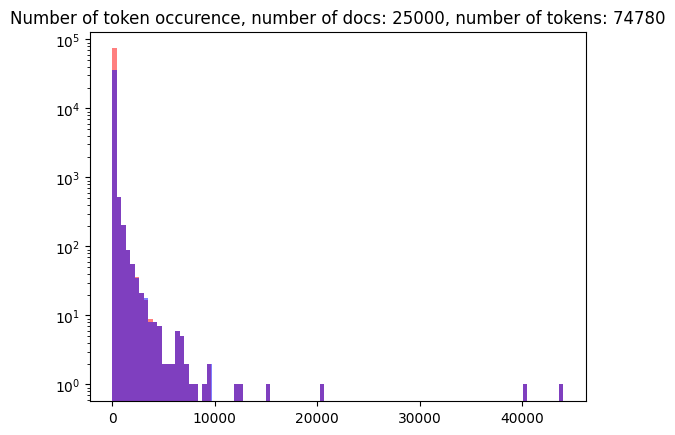

In [10]:
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > 0)], bins = 100, color = 'red', alpha = 0.5)
plt.hist([i for i in list(tc.token_absolute_count.values()) if (i > 2)], bins = 100, color = 'blue', alpha = 0.5)
plt.yscale("log")
plt.title(f"""Number of token occurence, number of docs: {tc.docs_count}, number of tokens: {tc.tokens_count}""")

In [11]:
tc.tokens_count

74780

In [12]:
len(tc.get_frequent_tokens(2,2))

43970

In [13]:
len(tc.get_rare_tokens(1,1))

28647

In [14]:
len(tc.get_frequent_tokens(2,2))+len(tc.get_rare_tokens(1,1))

72617

In [15]:
tc.get_rare_tokens(1,1)[:10]

['dodds',
 'kirkendalls',
 'roadtrip',
 'despirately',
 'hightailing',
 'vancamp',
 'shingles',
 'shipka',
 'ruptures',
 'tensionthe']

In [16]:
tc.get_frequent_tokens(8000, 4000)

['film',
 'good',
 'movie',
 'bad',
 'people',
 'way',
 'like',
 'time',
 'story',
 'great']

In [17]:
too_rare = tc.get_rare_tokens(2,2)
too_frequent = tc.get_frequent_tokens(8000, 4000)

tokens_to_exclude =  too_rare + too_frequent

In [18]:
corpus, token2index, index2token = tc.get_corpus(tokens_to_exclude)

Getting corpus: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25000/25000 [15:31<00:00, 26.85it/s]


In [19]:
labels = tc.labels

In [20]:
token2index

{'aa': 0,
 'aaa': 1,
 'aaargh': 2,
 'aag': 3,
 'aage': 4,
 'aames': 5,
 'aamir': 6,
 'aankhen': 7,
 'aapke': 8,
 'aardman': 9,
 'aargh': 10,
 'aaron': 11,
 'aatish': 12,
 'ab': 13,
 'aback': 14,
 'abandon': 15,
 'abandoned': 16,
 'abandoning': 17,
 'abandonment': 18,
 'abandons': 19,
 'abbas': 20,
 'abbey': 21,
 'abbot': 22,
 'abbott': 23,
 'abbreviated': 24,
 'abby': 25,
 'abc': 26,
 'abduct': 27,
 'abducted': 28,
 'abducting': 29,
 'abduction': 30,
 'abductor': 31,
 'abdul': 32,
 'abe': 33,
 'abel': 34,
 'abercrombie': 35,
 'aberration': 36,
 'abetted': 37,
 'abhay': 38,
 'abhishek': 39,
 'abhorrence': 40,
 'abhorrent': 41,
 'abide': 42,
 'abiding': 43,
 'abigail': 44,
 'abilities': 45,
 'ability': 46,
 'abject': 47,
 'ablaze': 48,
 'able': 49,
 'ably': 50,
 'abm': 51,
 'abnormal': 52,
 'abnormally': 53,
 'abo': 54,
 'aboard': 55,
 'abode': 56,
 'abolished': 57,
 'abolition': 58,
 'abominable': 59,
 'abominably': 60,
 'abomination': 61,
 'abominations': 62,
 'aboriginal': 63,
 'abori